In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../interpolation_test.csv')
df.head(20)

,Profile_type,Profile_id,Down-sampling,Interpolation,Down-sampling dx,MSE_accs,RMSE_accs
0,A,0,2,linear,0.600601,0.010507,0.102504
1,A,0,2,polinomial,0.600601,0.002433,0.049327
2,A,0,3,linear,0.900901,0.045752,0.213897
3,A,0,3,polinomial,0.900901,0.017117,0.130832
4,A,0,4,linear,1.201201,0.123728,0.351749
5,A,0,4,polinomial,1.201201,0.116795,0.341753
6,A,0,5,linear,1.501502,0.180017,0.424285
7,A,0,5,polinomial,1.501502,0.241368,0.491293
8,A,1,2,linear,0.600601,0.006543,0.080886
9,A,1,2,polinomial,0.600601,0.001984,0.044539


### Across all profile types

In [3]:
linear = []
polinomial = []
x = []

for i in np.unique(df['Down-sampling']):
    x.append(i)
    linear.append(np.mean(df.loc[df['Interpolation'] == 'linear'].loc[df['Down-sampling'] == i]['MSE_accs']))
    polinomial.append(np.mean(df.loc[df['Interpolation'] == 'polinomial'].loc[df['Down-sampling'] == i]['MSE_accs']))

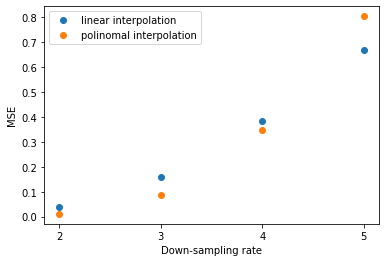

In [4]:
plt.plot(x, linear, 'o', label = 'linear interpolation')
plt.plot(x, polinomial, 'o', label = 'polinomal interpolation')
plt.xticks(x)
plt.ylabel('MSE')
plt.xlabel('Down-sampling rate')
plt.legend()
plt.show()

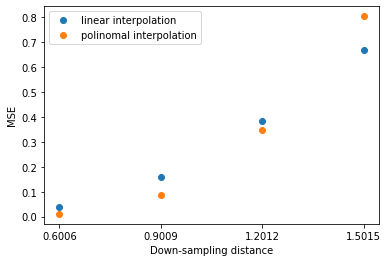

In [5]:
xd = np.unique(df['Down-sampling dx'])
plt.plot(xd, linear, 'o', label = 'linear interpolation')
plt.plot(xd, polinomial, 'o', label = 'polinomal interpolation')
plt.xticks(xd)
plt.ylabel('MSE')
plt.xlabel('Down-sampling distance')
plt.legend()
plt.show()

### Per profile type

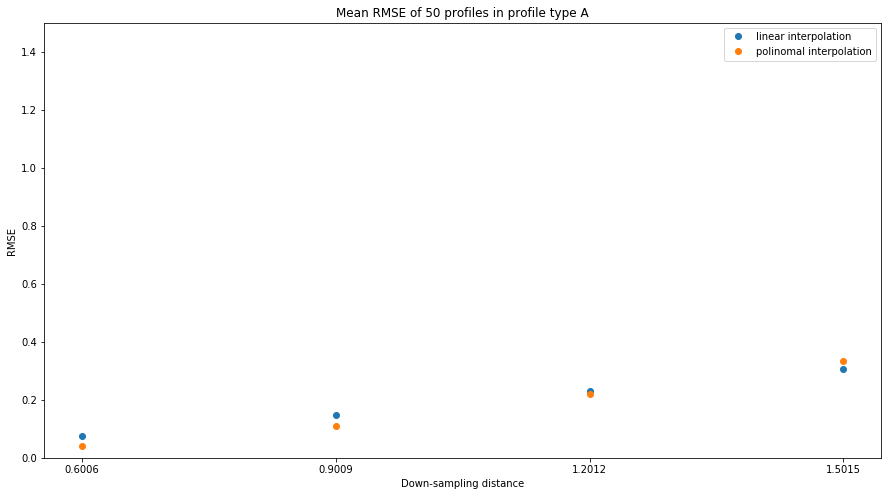

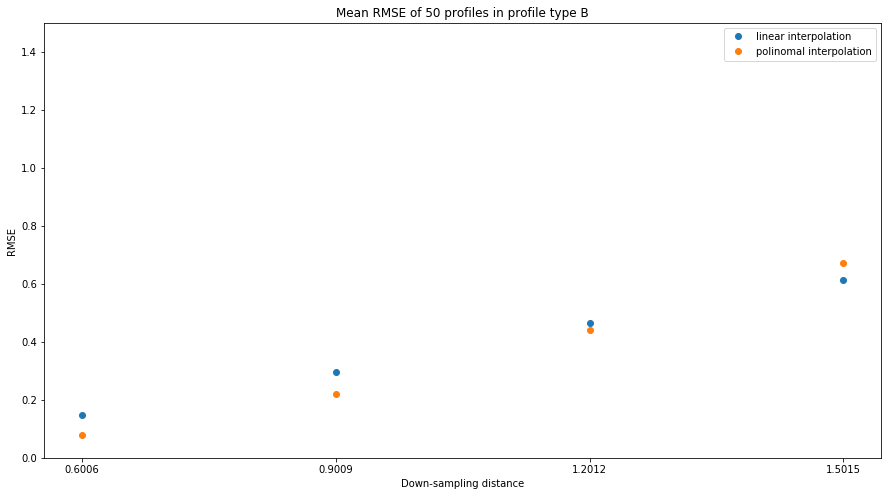

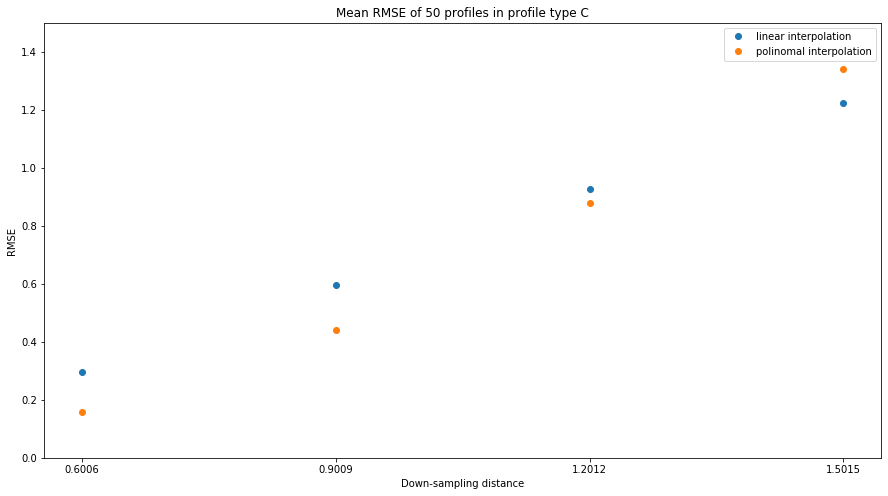

In [6]:

profile_types = np.unique(df['Profile_type'])

for p in profile_types:
    df_p = df.loc[df['Profile_type'] == p]
    
    linear_mse = []
    polinomial_mse = []
    
    linear_rmse = []
    polinomial_rmse = []
    
    x = []

    for i in np.unique(df['Down-sampling']):
        num_profiles = len(df_p.loc[df_p['Interpolation'] == 'linear'].loc[df_p['Down-sampling'] == i])
        
        x.append(i)
        
        linear_mse.append(np.mean(df_p.loc[df_p['Interpolation'] == 'linear'].loc[df_p['Down-sampling'] == i]['MSE_accs']))
        polinomial_mse.append(np.mean(df_p.loc[df_p['Interpolation'] == 'polinomial'].loc[df_p['Down-sampling'] == i]['MSE_accs']))
        
        linear_rmse.append(np.mean(df_p.loc[df_p['Interpolation'] == 'linear'].loc[df_p['Down-sampling'] == i]['RMSE_accs']))
        polinomial_rmse.append(np.mean(df_p.loc[df_p['Interpolation'] == 'polinomial'].loc[df_p['Down-sampling'] == i]['RMSE_accs']))
    
    xd = np.unique(df['Down-sampling dx'])
    plt.figure(figsize = (15, 8))
    plt.plot(xd, linear_rmse, 'o', label = 'linear interpolation')
    plt.plot(xd, polinomial_rmse, 'o', label = 'polinomal interpolation')
    plt.xticks(xd)
    plt.ylabel('RMSE')
    plt.xlabel('Down-sampling distance')
    plt.title("Mean RMSE of {} profiles in profile type {}".format(num_profiles, p))
    plt.legend()
    plt.ylim(0, 1.5)
    plt.show()